In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
my_personality = pd.read_csv('mypersonality_final.csv', encoding = "ISO-8859-1")

Let us first take a look at the data and see what are the basic statistical components

In [131]:
my_personality.describe()

,sEXT,sNEU,sAGR,sCON,sOPN,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
count,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9.917000e+03,9917.000000,9917.000000,9.917000e+03,9917.000000,9916.000000
mean,3.354760,2.609453,3.616643,3.474201,4.130386,429.377120,1.354253e+05,94.665170,3.154012,1.376425e+05,0.489920,0.128821
std,0.857578,0.760248,0.682485,0.737215,0.585672,428.760382,1.994338e+05,5.506696,311.073343,2.013921e+05,0.011908,0.106063
min,1.330000,1.250000,1.650000,1.450000,2.250000,24.000000,9.325000e+01,0.040000,0.000000,4.900000e-01,0.180000,0.000000
25%,2.710000,2.000000,3.140000,3.000000,3.750000,196.000000,1.690220e+04,93.770000,0.010000,1.798200e+04,0.490000,0.060000
50%,3.400000,2.600000,3.650000,3.400000,4.250000,317.000000,4.716690e+04,96.440000,0.020000,4.868300e+04,0.490000,0.090000
75%,4.000000,3.050000,4.150000,4.000000,4.550000,633.000000,1.966060e+05,97.880000,0.030000,1.981860e+05,0.500000,0.170000
max,5.000000,4.750000,5.000000,5.000000,5.000000,29724.900000,1.251780e+06,99.820000,30978.000000,1.263790e+06,0.500000,0.630000


##### Question 3
Using the data, compute the following descriptive statistics 

• Total number of users - user level stats

• Total number of status updates – status level stats

• Status updates per user (Mean, Median, Min, Max, Std) - status level stats 

##### Answer 3
We will the descriptive statistic functions to get the answers.

In [132]:
user_data = my_personality.groupby('#AUTHID').count()
print("The total number of users is {}" .format(len(user_data.index)))
print("The total number of status update is {}" .format(user_data.STATUS.sum()))

print("Descriptive statistics of status update per user:")
display(user_data['STATUS'].describe())

The total number of users is 250
The total number of status update is 9917
Descriptive statistics of status update per user:


count    250.000000
mean      39.668000
std       43.555875
min        1.000000
25%        8.000000
50%       25.000000
75%       54.750000
max      223.000000
Name: STATUS, dtype: float64

##### Question 4
Compute the following descriptive temporal statistics 

• Time difference (deltas) (in hours) between consecutive status updates (Mean, Median, Min, Max, Std). Discard data from users that only have one status update. 

Compute this in 2 ways: 

    (a) At the status level: using all status updates as if they were independent (don’t mix data from different users to compute deltas!)

    (b) At the user level: first compute the mean time difference for each user separately, and then use the mean value as attribute of each user to compute mean, median, etc. 

    (c) How different are the various statistics from the 2 ways of doing it?

• Plot the histogram of timestamps of all status updates on a month-by-month basis to cover all the time period. Do you see any pattern?

##### Answer 4

##### Answer 4. (a)

In this part part we will compute the time difference between all status updates as if they were independent.

Let us first compute the values of each users as if they were independent. To do so we calculate each difference per user and aggregate it as a whole

In [133]:
#Converting the dates into the right format
my_personality['DATE']= pd.to_datetime(my_personality['DATE'], errors='coerce')

In [142]:
#Computing the differences for each user
Authors_date_difference_a = my_personality.sort_values(['#AUTHID', 'DATE']).groupby('#AUTHID', as_index=False)['#AUTHID', 'DATE'].diff()
#Dropping the zero values, because they correspond to the change of user or to the case when a user has only one status
Authors_date_difference_a = Authors_date_difference_a.dropna(subset=['DATE'])
display(Authors_date_difference_a.describe())

,DATE
count,9666
mean,5 days 22:58:44.996896
std,19 days 02:24:37.958225
min,0 days 00:00:00
25%,0 days 18:55:00
50%,1 days 19:52:30
75%,4 days 13:31:15
max,366 days 00:43:00


###### Answer 4. (b)
We will now compute the mean value for each user and use this to compute the overall mean. 

In [277]:
#Computing the differences and the mean for each user
Authors_date_difference_b = pd.DataFrame(my_personality.sort_values(['#AUTHID', 'DATE']).groupby('#AUTHID', as_index=False)['DATE'].diff())

#Dropping the zeros
Authors_date_difference_b = Authors_date_difference_b.dropna(subset=['DATE'])

#Turning it into seconds to compute the mean value for each user
display(pd.to_timedelta(Authors_date_difference_b['DATE'].dt.seconds.mean(level=0).describe(), unit='s'))

count          00:03:58
mean    11:23:21.396845
std     02:57:54.430223
min            01:09:00
25%     10:14:24.868421
50%     11:16:31.151961
75%            12:29:00
max            23:56:00
Name: DATE, dtype: timedelta64[ns]

##### Question 5
Plot the cumulative distribution for:

    • number of status updates per user

    • Number of characters-per-message (at the status level)

    • Time difference between consecutive status updates (at the status level)

    • Depending on the specific variable to plot, use either a linear X axisor a logarithmic one.

##### Question 6
Using the Network features:


• Generate descriptive statistics for each network feature per user (Mean, Median, Min, Max, Std) 


• Plot the cumulative distribution for each network feature per user.

##### Answer 6

Let us first create a subest of the data in order to work with this object instead of the original dataframe.

In [60]:
Network_features = my_personality[['#AUTHID','NETWORKSIZE', 'BETWEENNESS',
                                   'NBETWEENNESS','DENSITY', 'BROKERAGE', 
                                   'NBROKERAGE', 'TRANSITIVITY']]
Network_features = Network_features.set_index('#AUTHID')

#Cleaning the DataFrame and getting rid of NaN values
Network_features = Network_features.dropna(how='any')

count    9916.000000
mean      426.422751
std       311.908261
min        24.000000
25%       196.000000
Name: NETWORKSIZE, dtype: float64

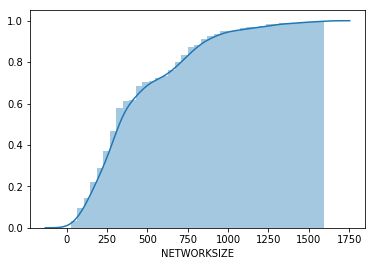

count      9916.000000
mean     135438.963208
std      199439.229077
min         185.710000
25%       16902.200000
Name: BETWEENNESS, dtype: float64

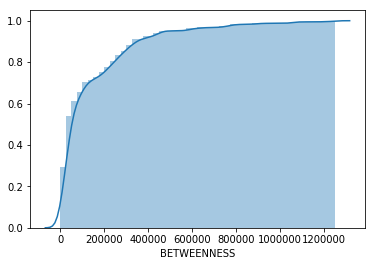

count    9916.000000
mean       94.674713
std         5.424353
min        31.210000
25%        93.770000
Name: NBETWEENNESS, dtype: float64

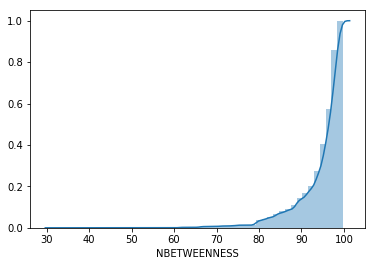

count    9916.000000
mean        0.030288
std         0.027709
min         0.000000
25%         0.010000
Name: DENSITY, dtype: float64

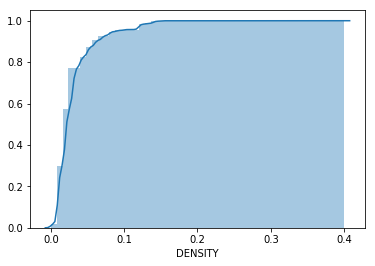

count      9916.000000
mean     137656.356999
std      201397.478019
min         241.000000
25%       17982.000000
Name: BROKERAGE, dtype: float64

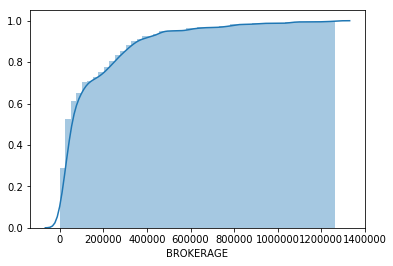

count    9916.000000
mean        0.489952
std         0.011494
min         0.320000
25%         0.490000
Name: NBROKERAGE, dtype: float64

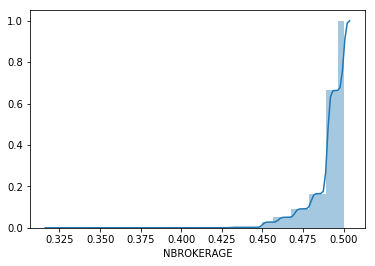

count    9916.000000
mean        0.128821
std         0.106063
min         0.000000
25%         0.060000
Name: TRANSITIVITY, dtype: float64

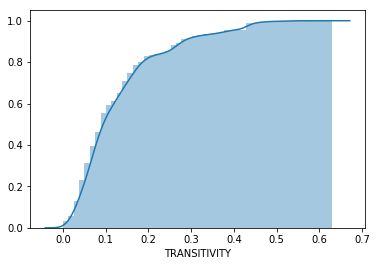

In [61]:
for column in Network_features.columns:
    display(Network_features[column].describe().head())
    sns.distplot(Network_features[column],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
    plt.show()
    plt.close()


###### Question 7
Using the Personality trait  features:

• Generate descriptive statistics for each trait (Mean, Median, Min, Max, Std)  

• Plot the cumulative distribution for each big-5 trait.

##### Answer 7

Grouping the data per user and then extracting the features

In [63]:
PersonalData = my_personality[['#AUTHID', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']]

PersonalData = PersonalData.set_index('#AUTHID')

#Cleaning the DataFrame and getting rid of NaN values
PersonalData = PersonalData.dropna(how='any')

count    9917.000000
mean        3.354760
std         0.857578
min         1.330000
25%         2.710000
Name: sEXT, dtype: float64

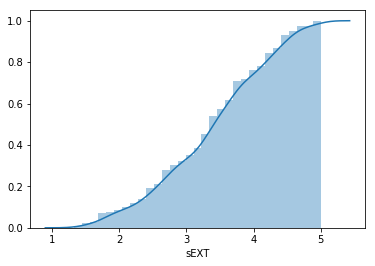

count    9917.000000
mean        2.609453
std         0.760248
min         1.250000
25%         2.000000
Name: sNEU, dtype: float64

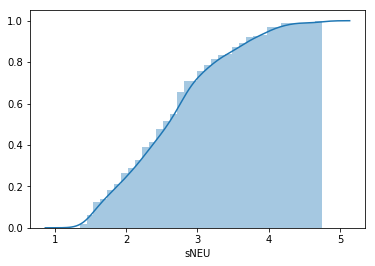

count    9917.000000
mean        3.616643
std         0.682485
min         1.650000
25%         3.140000
Name: sAGR, dtype: float64

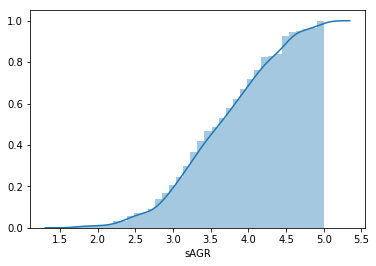

count    9917.000000
mean        3.474201
std         0.737215
min         1.450000
25%         3.000000
Name: sCON, dtype: float64

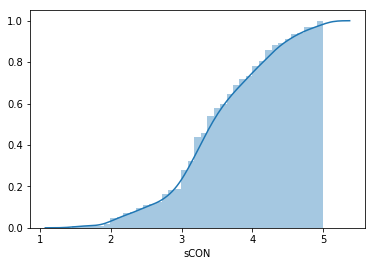

count    9917.000000
mean        4.130386
std         0.585672
min         2.250000
25%         3.750000
Name: sOPN, dtype: float64

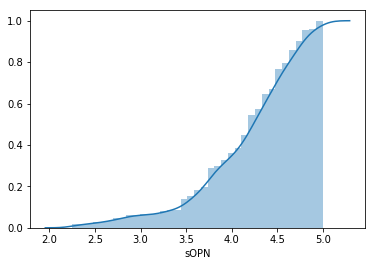

In [64]:
for column in PersonalData.columns:
    display(PersonalData[column].describe().head())
    sns.distplot(PersonalData[column],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
    plt.show()
    plt.close()